In [3]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from datasets import concatenate_datasets
from pysentimiento.irony import load_datasets, id2label

df = pd.read_table("../../data/irony/idpt/Training/training_tweets.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
pd.options.display.max_colwidth = 1000
df = df.rename(columns={"prediction": "label"})

df

,text,label,has_hashtag
0,"Para TIM, mudanças regulatórias devem acontecer em conjunto - / telecom telefonia mercado regulação economia",0,False
1,"Quando cheguei a Montemor, gozavam comigo por montar a cavalo, agora toda a gente anda na equitação",1,False
2,"“: Trepidante liderança"" Foi , Marisa BBB15” Ela não pegou.""",1,False
3,Sim sim... nego não sabe diferenciar... você tem que colocar no final sério,1,False
4,Obg Rosa !! Mas Mariza n faz fofoca kkkk tem 51 e é um amor de pessoa,1,False
...,...,...,...
15207,"então , se TODO mundo é contra a corrupção, como acontece?",1,False
15208,Economia - A NOVA ECONOMIA. [fonte: Estadão],0,False
15209,Maioria dos membros da Fed é favorável a uma nova subida das taxas de juro finanças economia dinheiro,0,False
15210,"Míriam Leitão: alta do PIB mostra que recessão acabou, mas ainda não há crescimento. economia…",0,False


In [8]:
# look for hashtags

df["has_hashtag"] = df["text"].str.contains("#")


df[df["has_hashtag"] == True]

,text,label,has_hashtag
28,"(...) outro amor na vida igual ao amor de mãe."";;@misterpinkeyes;#ironia;701571956747980801""",1,True
328,"Como vai ser a programação do fim do mundo? Vai dar meia noite vai acabar tudo, ou vai ter tempo pra saquear umas lojas e tal??? #QDuvida ",1,True
1423,"Se é o fim do mundo, ou não, eu não sei mas se for eu quero que se foda porque eu fui na minha ultima noite então!! #AGORACHUPA",1,True
1669,"Que ""fim do mundo"" mais monótono esse em. #Maiasfail",1,True
2319,RT @klassmannlucas: Qual será a desculpa da CEEE pra estar faltando luz pra milhares hoje em Poa?? O calor? O fim do mundo?? #incompetentes #provincianos,1,True
2871,Alguém tem notícia do outro lado do mundo?? Lá o fim do mundo já deveria ter chegado! #FimDoMundoFail,1,True
2909,"“@cyrosmf: ""Não me perguntes onde fica o fim do mundo/Segue o rumo da primeira explosão..."" #GauchanoFimdoMundo” SOS",1,True
5264,“@jaimeramos21: @deodatoramalho @DanideAssis Definitivamente o fim do mundo está próximo.” #TaBraboIssoAiTche!!,1,True
5275,"RT : O povo brasileiro não quer de volta aqueles que trouxeram o racionamento de energia Dilma13PraVencer"";;@dilmabr;#IRONIA #Dilma13PraVencer;559083130024648704""",1,True
5307,"Será o fim do mundo? Curta no pensamento do dia, #DailyLift: ""Will the world end?"" com Fujiko Signs, CSB http://t.co/WjjG4lb7",1,True


In [9]:
# Train dev test split 
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
train, dev = train_test_split(train, test_size=0.2, random_state=42)

train.shape, dev.shape, test.shape

((9735, 3), (2434, 3), (3043, 3))

In [31]:
# Train a logistic regression model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()

vectorizer = CountVectorizer(tokenizer=tknzr.tokenize, binary=True)

X_train = vectorizer.fit_transform(train["text"])
X_dev = vectorizer.transform(dev["text"])
X_test = vectorizer.transform(test["text"])

y_train = train["label"]
y_dev = dev["label"]
y_test = test["label"]

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [32]:
# Check performance

from sklearn.metrics import classification_report

y_pred = model.predict(X_dev)
print(classification_report(y_dev, y_pred, target_names=id2label.values()))

              precision    recall  f1-score   support

  not ironic       0.99      0.97      0.98       402
      ironic       0.99      1.00      1.00      2032

    accuracy                           0.99      2434
   macro avg       0.99      0.98      0.99      2434
weighted avg       0.99      0.99      0.99      2434



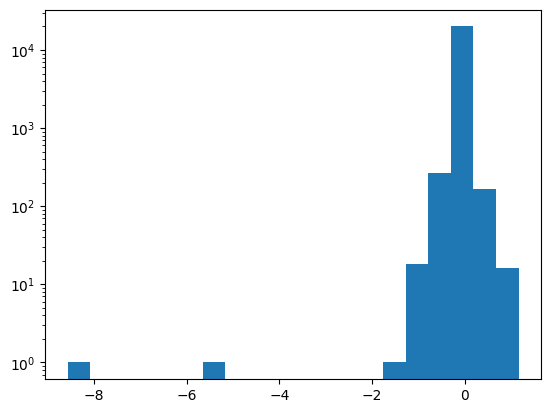

In [33]:
# Plot histogram of coefficients

import matplotlib.pyplot as plt

plt.hist(model.coef_[0], bins=20)
# Log scale
plt.yscale("log")

In [34]:
model.coef_.shape

(1, 20468)

In [37]:
# Get largest coefficients

import numpy as np

largest = np.argsort(np.abs(model.coef_[0]))[-50:]
inverse_vocab = {v: k for k, v in vectorizer.vocabulary_.items()}

for i in largest:
    print(f"({i}){inverse_vocab[i]}: {model.coef_[0][i]}")

(16881)rápido: -0.7099825621989335
(49)...: 0.7102516856356271
(13386)novo: -0.7169510345594823
(6876)economiailuminaçãoeficienciaenergeticaluminariaindustrialluminarialedlampadaled: -0.7172364917406987
(10669)ironía: 0.7175649733117982
(10745)itens: -0.7291661324071421
(2358)atenção: -0.7336246610450333
(19503)valor: -0.7369127710791374
(2990)bi: -0.737917872919724
(46)..: 0.7401791942923804
(15038)poupadora: -0.7458497723911414
(7119)empobreceeconomia: -0.7458497723911414
(7263)enriquece: -0.7458497723911414
(4988)consumista: -0.7458497723911414
(7826)eu: 0.7501367982398781
(13146)nem: 0.7522596524131956
(15730)q: 0.7577829291038881
(6954)eficiência: -0.7591347132229412
(1070)acordo: -0.7659648599761026
(14589)peça: -0.766945177098089
(6874)economiafacilidade: -0.7687850193880695
(3073)blog: -0.7774106510030332
(6299)dicom: -0.7849207761220663
(12337)merecem: -0.7857180109028046
(704)?: 0.7915065984133598
(670):: -0.7940846282766116
(14789)pneus: -0.8012014669040627
(8399)ficaadicapo

In [27]:
# Now, let's try to train a model with just the most important features (those in indices)
X_train_2 = X_train[:, largest]
X_dev_2 = X_dev[:, largest]
X_test_2 = X_test[:, largest]


model = LogisticRegression()
model.fit(X_train_2, y_train)

LogisticRegression()

In [28]:
# Check performance

from sklearn.metrics import classification_report

y_pred = model.predict(X_dev_2)
print(classification_report(y_dev, y_pred, target_names=id2label.values()))

              precision    recall  f1-score   support

  not ironic       0.99      0.99      0.99       402
      ironic       1.00      1.00      1.00      2032

    accuracy                           1.00      2434
   macro avg       0.99      0.99      0.99      2434
weighted avg       1.00      1.00      1.00      2434



In [40]:
type(X_train[:,6384]), type(y_train.values.reshape(-1, 1))

(scipy.sparse._csr.csr_matrix, numpy.ndarray)

In [11]:
# Calculate correlations

np.corrcoef(X_train[:,6384], y_train.values.reshape(-1, 1))

In [24]:
from datasets import Dataset, Value, ClassLabel, Features, DatasetDict

features = Features({
    'text': Value('string'),
    'label': ClassLabel(num_classes=2, names=["non ironic", "ironic"]),
})


train = Dataset.from_pandas(train, features=features, preserve_index=False)
dev = Dataset.from_pandas(dev, features=features, preserve_index=False)
test = Dataset.from_pandas(test, features=features, preserve_index=False)

ds = DatasetDict(
    train=train,
    dev=dev,
    test=test
)

ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 9735
    })
    dev: Dataset({
        features: ['text', 'label'],
        num_rows: 2434
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3043
    })
})

In [25]:
ds.push_to_hub("pysentimiento/pt_irony", private=True)

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
# Get unique texts in df 

df.text.nunique()

15212